In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
import acquire
import prepare
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

### 1. Spam Data

- Load the spam data set.
- Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
- Is there any overlap in the bigrams for the spam data and the ham data?
- Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [2]:
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

In [3]:
def clean(text):
    '''Simplified text cleaning function'''
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return re.sub(r"[^a-z0-9\s]", '', text)

In [4]:
# Load the spam data set
df = pd.read_csv('./spam_clean.csv')
print(df.shape)
df.head(20)

(5572, 2)


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [5]:
# real texts
ham_words = clean(' '.join(df[df.label == 'ham'].text))

#spam messages
spam_words = clean(' '.join(df[df.label == 'spam'].text))

# all messages
all_words = clean(' '.join(df.text))

In [6]:
# Create and explore bigrams for the spam data. Visualize them 
# with a word cloud. How do they compare with the ham bigrams?

# pd.Series(nltk.bigrams(spam_words.split())).value_counts().head(10).plot.barh()
# plt.title('Top 10 most common spam bigrams')

def ngrams_wordcloud (text_list, title_list, n=2):
    for i in  range (0, len(text_list)):
        plt.figure(figsize=(20,16))
        plt.subplot(2,2,1)
        pd.Series(nltk.ngrams(text_list[i].split(), n=n)).value_counts().head(10).plot.barh()
        plt.title(f'Top 10 most common {title_list[i]} ngrams where n={n}')
        plt.subplot(2,2,2)
        img = WordCloud(background_color='white', width=800, height=600).generate(text_list[i])
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Top 10 most common {title_list[i]} ngrams where n={n}')
        #plt.tight_layout()
        plt.show()

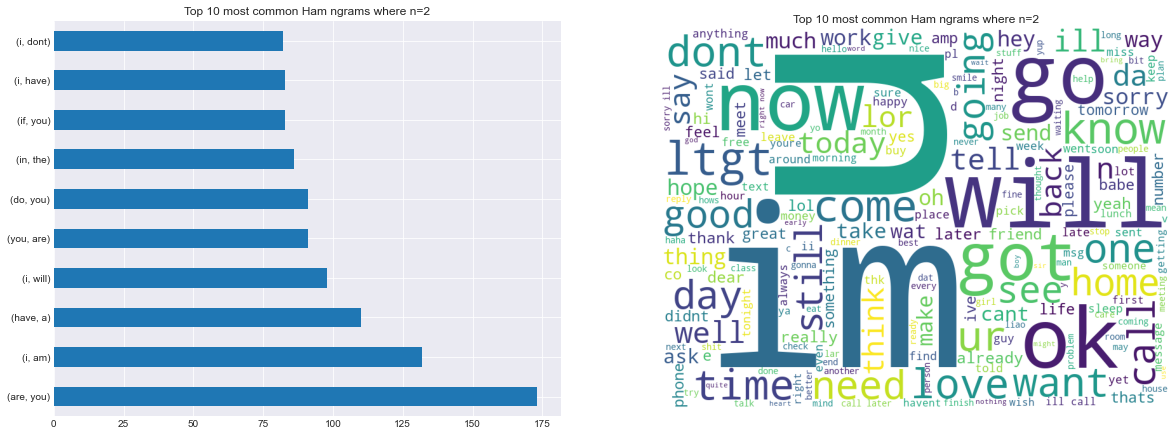

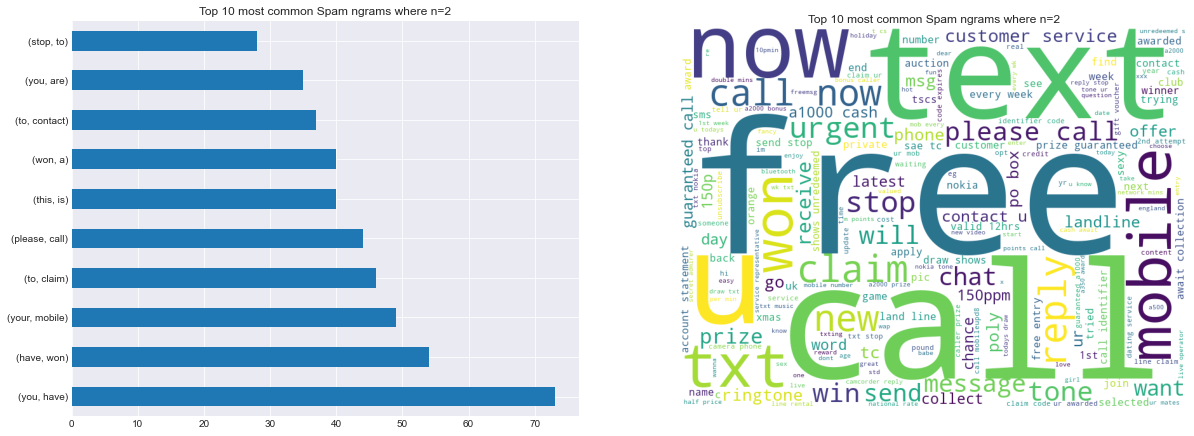

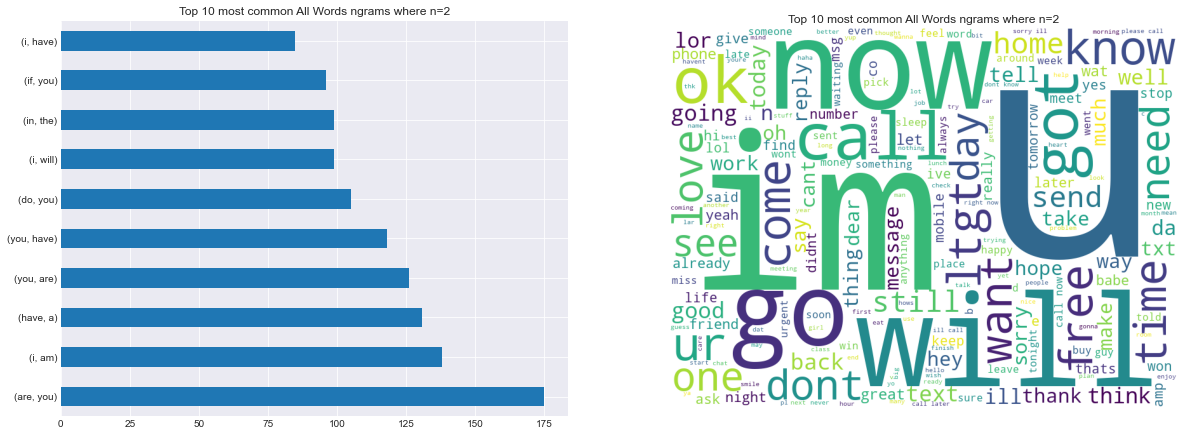

In [7]:
from wordcloud import WordCloud

# img = WordCloud(background_color='white', width=800, height=600).generate(spam_words)
# plt.imshow(img)
# plt.axis('off')

text_list= [ham_words, spam_words, all_words]
title_list=['Ham', 'Spam', 'All Words']
ngrams_wordcloud(text_list, title_list)

In [8]:
# Is there any overlap in the bigrams for the spam data and the 
# ham data?

# yes

In [9]:
# Create and explore with trigrams (i.e. a n-gram with an n of 3) 
# for both the spam and ham data.

In [10]:
# pd.Series(nltk.trigrams(spam_words.split())).value_counts().head(10).plot.barh()
# plt.title('Top 10 most common spam trigrams')

def ngrams_wordcloud (text_list, title_list, n=2):
    for i in  range (0, len(text_list)):
        plt.figure(figsize=(20,16))
        plt.subplot(2,2,1)
        pd.Series(nltk.ngrams(text_list[i].split(), n=n)).value_counts().head(10).plot.barh()
        plt.title(f'Top 10 most common {title_list[i]} ngrams where n={n}')
        plt.subplot(2,2,2)
        img = WordCloud(background_color='white', width=800, height=600).generate(text_list[i])
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Top 10 most common {title_list[i]} ngrams where n={n}')
        #plt.tight_layout()
        plt.show()

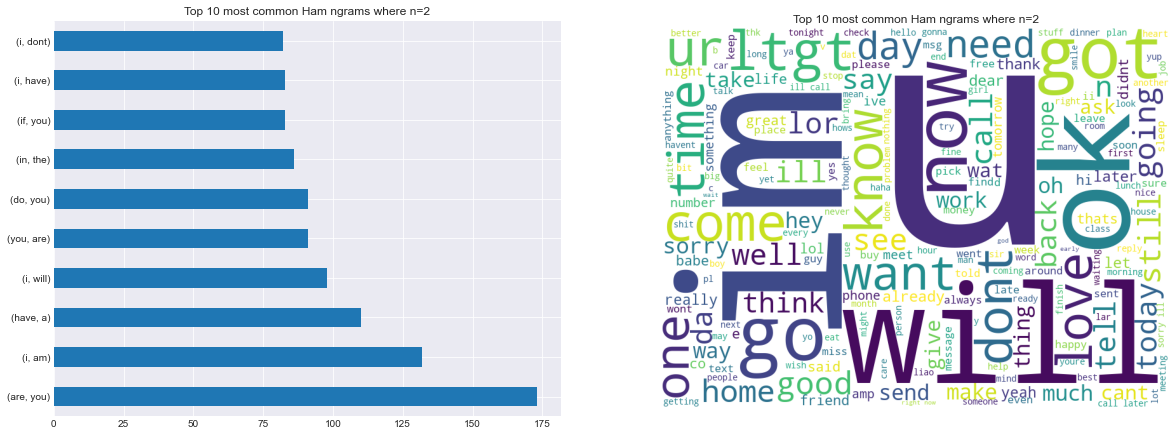

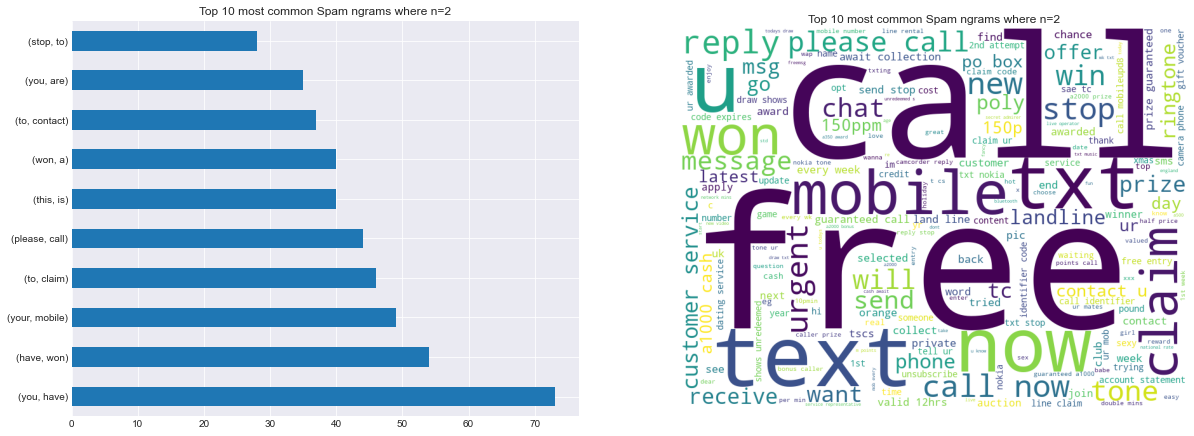

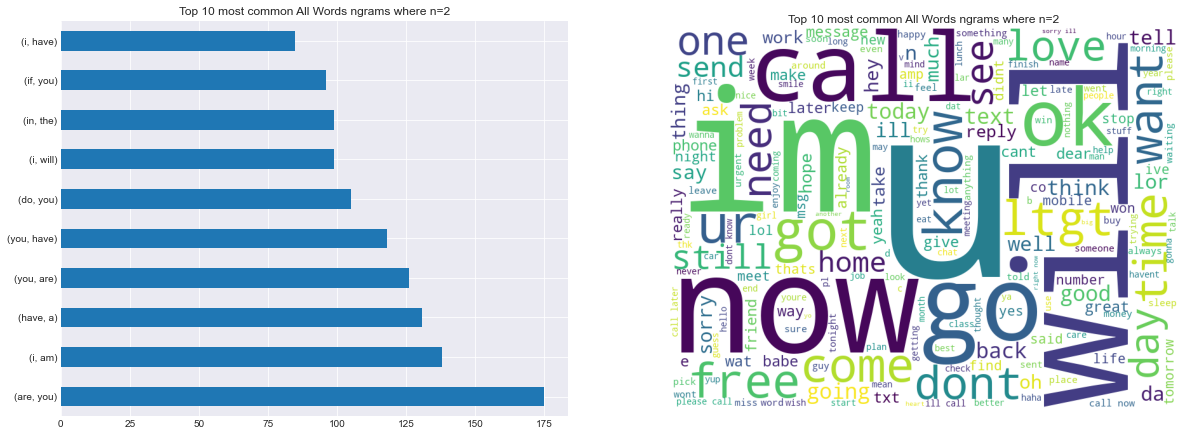

In [11]:
text_list= [ham_words, spam_words, all_words]
title_list=['Ham', 'Spam', 'All Words']
ngrams_wordcloud(text_list, title_list)

Text(0.5, 1.0, 'Top 10 most common spam trigrams')

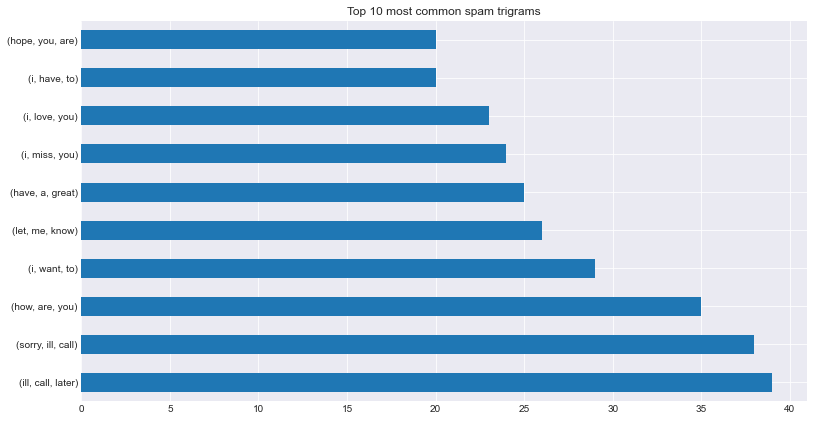

In [12]:
pd.Series(nltk.trigrams(ham_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common spam trigrams')

### 2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [13]:
codeup_df = acquire.get_blogs()
codeup_df.head()

,title,date,category,content
0,Codeup Launches First Podcast: Hire Tech,"Aug 25, 2021",Codeup News,Any podcast enthusiasts out there? We are plea...
1,Why Should I Become a System Administrator?,"Aug 23, 2021",Tips for Prospective Students,"With so many tech careers in demand, why choos..."
2,Announcing our Candidacy for Accreditation!,"Jun 30, 2021",Codeup News,Did you know that even though we’re an indepen...
3,Codeup Takes Over More of the Historic Vogue B...,"Jun 21, 2021",Codeup News,Codeup is moving into another floor of our His...
4,Inclusion at Codeup During Pride Month (and Al...,"Jun 4, 2021",Codeup News,Happy Pride Month! Pride Month is a dedicated ...


In [14]:
# def basic_clean(string):
#     '''
#     This function takes in a string and
#     returns the string normalized.
#     '''
#     string = unicodedata.normalize('NFKD', string)\
#              .encode('ascii', 'ignore')\
#              .decode('utf-8', 'ignore')
#     string = re.sub(r'[^\w\s]', '', string).lower()
#     return string




# def prep_article_data(df, column, extra_words=[], exclude_words=[]):
#     '''
#     This function take in a df and the string name for a text column with
#     option to pass lists for extra_words and exclude_words and
#     returns a df with the text article title, original text, stemmed text,
#     lemmatized text, cleaned, tokenized, & lemmatized text with stopwords removed.
#     '''
#     df['clean'] = df[column].apply(basic_clean)\
#                             .apply(prepare.tokenize)\
#                             .apply(prepare.remove_stopwords,
#                                    extra_words=extra_words,
#                                    exclude_words=exclude_words)
#     df['stemmed'] = df['clean'].apply(prepare.stem)
#     df['lemmatized'] = df['clean'].apply(prepare.lemmatize)
#     return df

In [15]:
# # real words
# ham_words = clean(' '.join(codeup_df[codeup_df.label == 'ham'].text))
# # spam words
# spam_words = clean(' '.join(codeup_df[codeup_df.label == 'spam'].text))

#all words
all_words = clean(' '.join(codeup_df.content))

In [16]:
all_words.split()[:10]

['any',
 'podcast',
 'enthusiasts',
 'out',
 'there',
 'we',
 'are',
 'pleased',
 'to',
 'announce']

In [17]:
pd.Series(all_words.split()).value_counts()

the           77
and           75
to            59
in            45
a             44
              ..
transition     1
last           1
never          1
three          1
alum           1
Length: 751, dtype: int64

In [18]:
# remove stopwords
article = prepare.remove_stopwords(all_words)
article

'podcast enthusiasts pleased announce release codeups first podcast hire tech hire tech conversation new developers people hire hosted ceo cofounder jason straughan world entrylevel positions often require 3 years experience jason sets discover like break work modern tech industry hear various perspectives interviews codeup alumni tech leaders hired codeup stories show impact codeup tech world empowering community real life change first episode jason interviews codeup alum ryan smith working software developer software engineer nearly two years missionary colombia dog handler afghanistan ryans life experiences one many ways codeup grads stand employers paired interview preparation trick listen learn episode reveal went job search total confidence would tell hiring managers regarding juniorlevel talent shouldnt get caught applicant knowing primary language give listen spotify also available apple podcasts anchor google podcasts perfect morning commute many tech careers demand choose sys

In [19]:
#turn all words into a series
#get value count of all words (after stopwords removed)
pd.Series(article.split()).value_counts()

tech       29
codeup     15
career     13
system     12
get        10
           ..
operate     1
coding      1
unsafe      1
pushes      1
alum        1
Length: 666, dtype: int64

In [20]:
#assign to a variable
word_freq = pd.Series(article.split()).value_counts()
word_freq.head()

tech      29
codeup    15
career    13
system    12
get       10
dtype: int64

In [21]:
# pd.Series(nltk.trigrams(spam_words.split())).value_counts().head(10).plot.barh()
# plt.title('Top 10 most common spam bigrams')

def ngrams_wordcloud (text_list, title_list, n=2):
    for i in  range (0, len(text_list)):
        plt.figure(figsize=(20,16))
        plt.subplot(2,2,1)
        pd.Series(nltk.ngrams(text_list[i].split(), n=n)).value_counts().head(10).plot.barh()
        plt.title(f'Top 10 most common {title_list[i]} ngrams where n={n}')
        plt.subplot(2,2,2)
        img = WordCloud(background_color='white', width=800, height=600).generate(text_list[i])
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Top 10 most common {title_list[i]} ngrams where n={n}')
        #plt.tight_layout()
        plt.show()

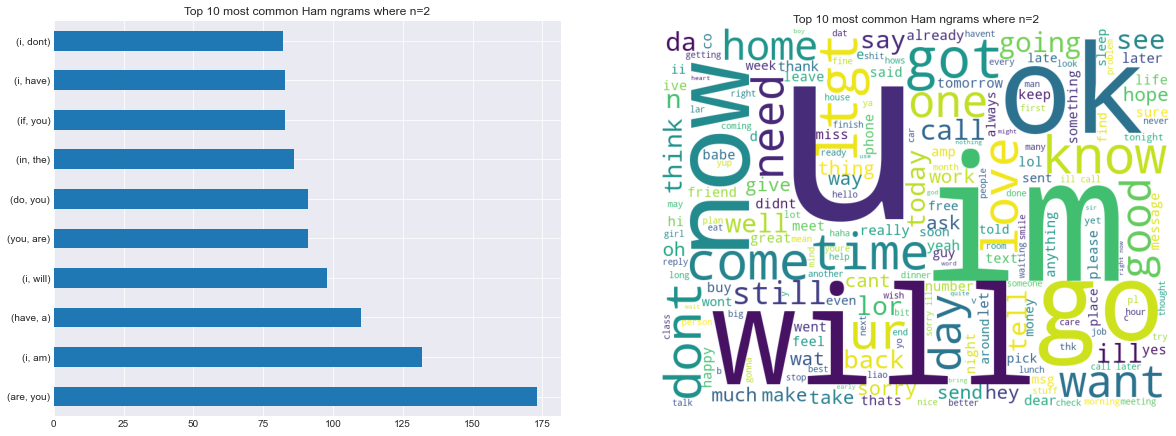

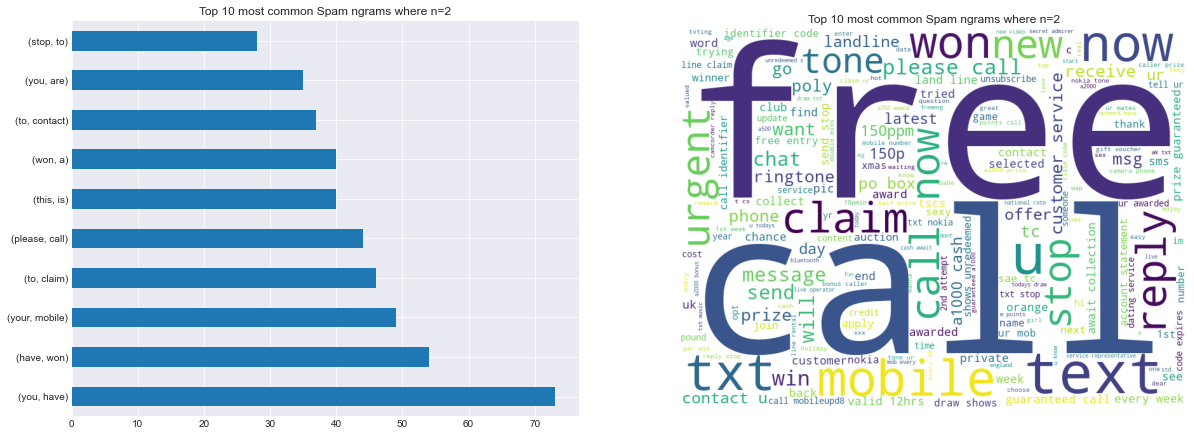

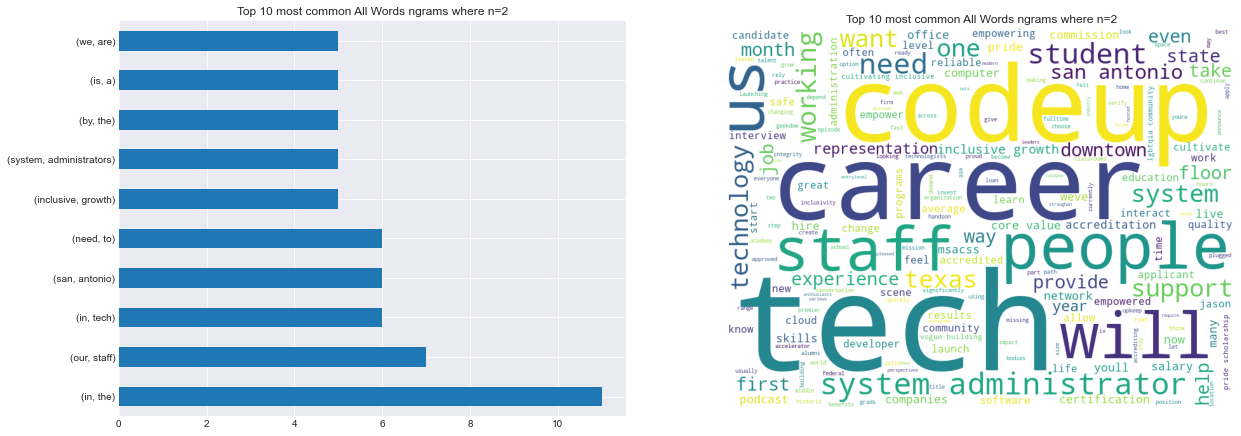

In [22]:
text_list= [ham_words, spam_words, all_words]
title_list=['Ham', 'Spam', 'All Words']
ngrams_wordcloud(text_list, title_list)

### 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [24]:
categories = ["business", "sports", "technology", "entertainment", "science", "world"]
news_df = acquire.get_all_news_articles(categories)

In [27]:
business_words = clean(' '.join(news_df[news_df.category=='business'].content))

In [28]:
sports_words = clean(' '.join(news_df[news_df.category=='sports'].content))

In [29]:
tech_words = clean(' '.join(news_df[news_df.category=='technology'].content))

In [30]:
entertainment_words = clean(' '.join(news_df[news_df.category=='entertainment'].content))

In [31]:
science_words = clean(' '.join(news_df[news_df.category=='science'].content))

In [32]:
world_words = clean(' '.join(news_df[news_df.category=='world'].content))

In [33]:
business_bigrams = (pd.Series(nltk.ngrams(business_words.split(),2)).value_counts().head(20))

sports_bigrams = (pd.Series(nltk.ngrams(sports_words.split(),2)).value_counts().head(20))

tech_bigrams = (pd.Series(nltk.ngrams(tech_words.split(),2)).value_counts().head(20))

entertainment_bigrams = (pd.Series(nltk.ngrams(entertainment_words.split(),2)).value_counts().head(20))

science_bigrams = (pd.Series(nltk.ngrams(science_words.split(),2)).value_counts().head(20))

world_bigrams = (pd.Series(nltk.ngrams(world_words.split(),2)).value_counts().head(20))

In [34]:
entertainment_bigrams

(granted, bail)     12
(aryan, khan)       11
(in, the)           10
(shah, rukh)         9
(said, that)         8
(was, granted)       8
(on, thursday)       7
(high, court)        7
(bombay, high)       7
(cruise, drugs)      6
(mumbai, cruise)     6
(rukh, khans)        6
(the, film)          6
(further, said)      5
(took, to)           5
(has, said)          5
(khan, was)          5
(to, the)            5
(drugs, case)        5
(after, aryan)       5
dtype: int64

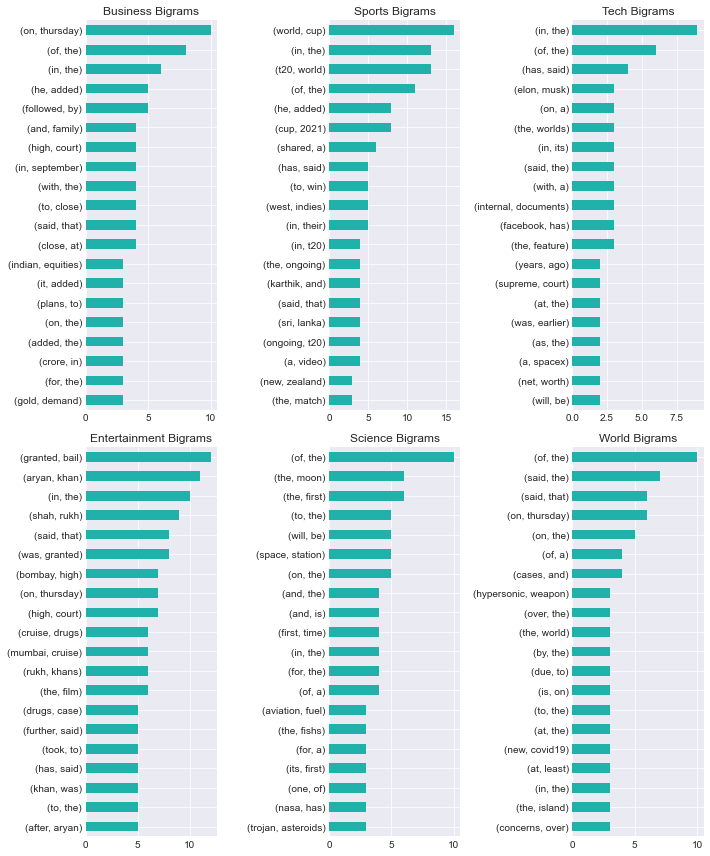

In [35]:
plt.subplot(2,3,1)
business_bigrams.sort_values(ascending=True).plot.barh(figsize =(10,12),color='lightseagreen')
plt.title('Business Bigrams')

plt.subplot(2,3,2)
sports_bigrams.sort_values(ascending=True).plot.barh(figsize =(10,12),color='lightseagreen')
plt.title('Sports Bigrams')

plt.subplot(2,3,3)
tech_bigrams.sort_values(ascending=True).plot.barh(figsize =(10,12),color='lightseagreen')
plt.title('Tech Bigrams')

plt.subplot(2,3,4)
entertainment_bigrams.sort_values(ascending=True).plot.barh(figsize =(10,12),color='lightseagreen')
plt.title('Entertainment Bigrams')

plt.subplot(2,3,5)
science_bigrams.sort_values(ascending=True).plot.barh(figsize =(10,12),color='lightseagreen')
plt.title('Science Bigrams')

plt.subplot(2,3,6)
world_bigrams.sort_values(ascending=True).plot.barh(figsize =(10,12),color='lightseagreen')
plt.title('World Bigrams')

plt.tight_layout()
plt.show()

Top Bigrams for Business


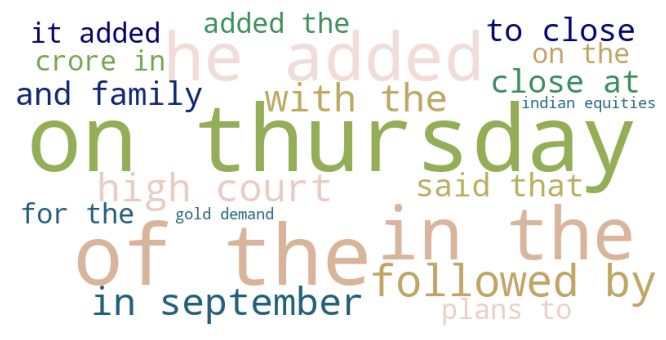

In [36]:
print('Top Bigrams for Business')
data = {k[0] + ' ' + k[1]: v for k, v in business_bigrams.to_dict().items()}
img = WordCloud(background_color='white', colormap = 'gist_earth',width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(12, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

Top Bigrams for Sports


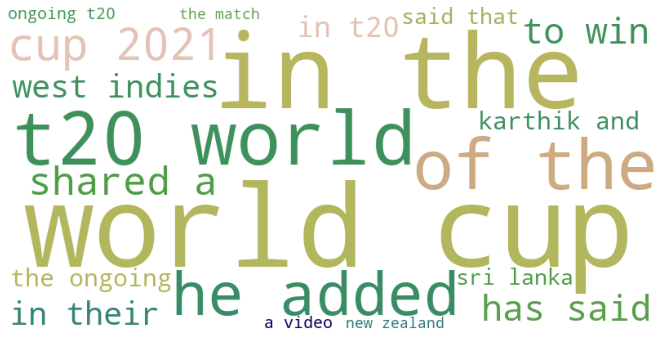

In [37]:
print('Top Bigrams for Sports')
data = {k[0] + ' ' + k[1]: v for k, v in sports_bigrams.to_dict().items()}
img = WordCloud(background_color='white', colormap = 'gist_earth',width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(12, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

Top Bigrams for Tech


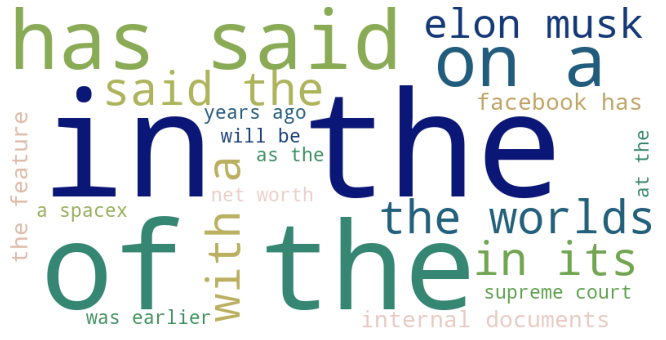

In [38]:
print('Top Bigrams for Tech')
data = {k[0] + ' ' + k[1]: v for k, v in tech_bigrams.to_dict().items()}
img = WordCloud(background_color='white', colormap = 'gist_earth',width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(12, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

Top Bigrams for Entertainment


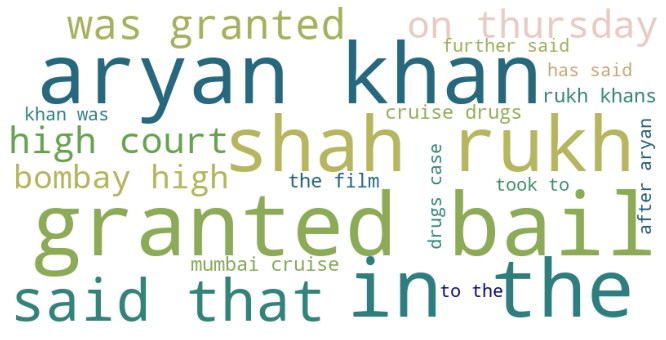

In [39]:
print('Top Bigrams for Entertainment')
data = {k[0] + ' ' + k[1]: v for k, v in entertainment_bigrams.to_dict().items()}
img = WordCloud(background_color='white', colormap = 'gist_earth',width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(12, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

Top Bigrams for Science


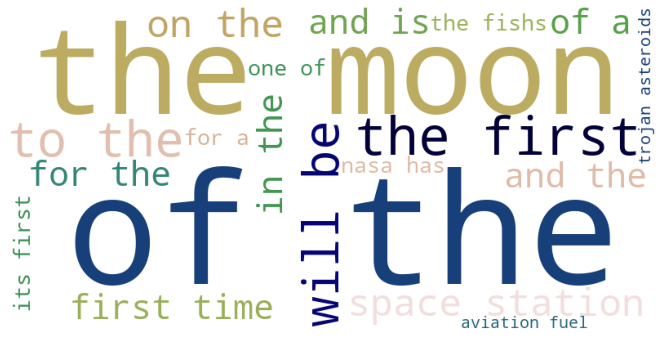

In [40]:
print('Top Bigrams for Science')
data = {k[0] + ' ' + k[1]: v for k, v in science_bigrams.to_dict().items()}
img = WordCloud(background_color='white', colormap = 'gist_earth',width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(12, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

Top Bigrams for World


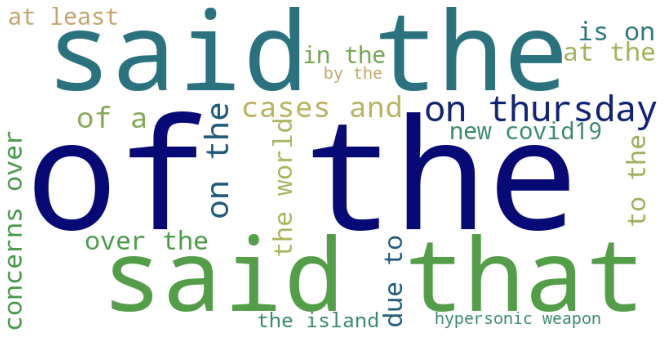

In [41]:
print('Top Bigrams for World')
data = {k[0] + ' ' + k[1]: v for k, v in world_bigrams.to_dict().items()}
img = WordCloud(background_color='white', colormap = 'gist_earth',width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(12, 6))
plt.imshow(img)
plt.axis('off')
plt.show()